#  Análisis Exploratorio Inicial - Call Center 1999

##  Anonymous Bank - Análisis de Datos de Call Center

### Descripción del Proyecto

Este notebook realiza la exploración inicial del dataset del Call Center del "Anonymous Bank" correspondiente al año 1999. El análisis incluye:

- **Carga y estructura de datos**: Comprensión del formato y dimensiones
- **Análisis descriptivo**: Estadísticas básicas y distribuciones
- **Calidad de datos**: Identificación de valores faltantes y outliers
- **Análisis temporal**: Patrones por fecha, hora y día de la semana
- **Análisis operacional**: Tiempos de servicio, colas y eficiencia
- **Visualizaciones iniciales**: Gráficos exploratorios para entender los datos

### Objetivos

1. **Comprender la estructura** del dataset y sus variables
2. **Identificar patrones temporales** en las llamadas
3. **Analizar la eficiencia operacional** del call center
4. **Detectar anomalías** y problemas de calidad de datos
5. **Generar insights iniciales** para análisis posteriores

---

## 1. Importamos las librerías necesarias

Importamos todas las librerías necesarias para el análisis exploratorio de datos.

In [1]:
# Vamos a importar las librerías necesarias para manipular y analizar los datos
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Importamos librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



# Configuramos el estilo de los gráficos y las opciones de pandas
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configuramos Plotly para visualizaciones interactivas
import plotly.io as pio
pio.templates.default = "plotly_white"

print("Librerías importadas correctamente")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib backend: {plt.get_backend()}")

Librerías importadas correctamente
Pandas version: 2.2.3
NumPy version: 2.2.6
Matplotlib backend: module://matplotlib_inline.backend_inline


---

## 2. Carga y Estructura de Datos

### Carga del Dataset

In [ ]:
# Definimos la ruta del archivo CSV de datos en bruto y verificamos su existencia
data_path = "../00_data/raw/Call_Center_1999_DataSet.csv"
import os
if os.path.exists(data_path):
    print(f"Archivo encontrado: {data_path}")
    file_size = os.path.getsize(data_path) / (1024 * 1024)  # MB
    print(f"Tamaño del archivo: {file_size:.2f} MB")
else:
    print(f"Archivo no encontrado: {data_path}")
    
# Cargamos el dataset y medimos el tiempo de carga
print("\nCargando datos...")
start_time = datetime.now()

try:
    # Probamos cargar el dataset con los parámetros principales
    df = pd.read_csv(
        data_path, 
        sep=';',  
        encoding='utf-8',  
        on_bad_lines='skip',  
        quotechar='"',  
        low_memory=False  
    )
    load_time = datetime.now() - start_time
    print(f"Datos cargados exitosamente en {load_time.total_seconds():.2f} segundos")
    print(f"Dimensiones del dataset: {df.shape[0]:,} filas x {df.shape[1]} columnas")
except Exception as e:
    print(f"Error al cargar los datos: {e}")
    print("\nIntentamos con diferentes parámetros...")
    try:
        df = pd.read_csv(
            data_path,
            sep=';',
            encoding='latin-1',  
            on_bad_lines='skip',
            quoting=1  # QUOTE_ALL
        )
        print(f"Datos cargados con parámetros alternativos")
        print(f"Dimensiones del dataset: {df.shape[0]:,} filas x {df.shape[1]} columnas")
    except Exception as e2:
        print(f"Error persistente: {e2}")
        print("Sugerimos verificar manualmente el formato del archivo CSV")

# Inspeccionamos la estructura general del dataset
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 50)
print(f"Número de filas: {df.shape[0]:,}")
print(f"Número de columnas: {df.shape[1]}")
print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nCOLUMNAS DEL DATASET:")
print("-" * 30)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\nPRIMEROS 5 REGISTROS:")
print("=" * 50)
display(df.head())

# Analizamos los tipos de datos y la información detallada del DataFrame
print("TIPOS DE DATOS Y INFORMACIÓN DETALLADA")
print("=" * 50)
print("\nInformación del DataFrame:")
df.info(memory_usage='deep')
print("\nANÁLISIS DE TIPOS DE DATOS:")
print("-" * 40)
data_types_summary = df.dtypes.value_counts()
print("\nDistribución de tipos de datos:")
for dtype, count in data_types_summary.items():
    print(f"  {dtype}: {count} columnas")
# Identificamos columnas categóricas, numéricas y de fecha/hora
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
print(f"\nColumnas numéricas: {len(numeric_cols)}")
print(f"Columnas categóricas: {len(categorical_cols)}")
print(f"Columnas de fecha/hora: {len(datetime_cols)}")
if numeric_cols:
    print(f"\nColumnas numéricas: {numeric_cols}")
if categorical_cols:
    print(f"\nColumnas categóricas: {categorical_cols}")
if datetime_cols:
    print(f"\nColumnas fecha/hora: {datetime_cols}")

# Calculamos las estadísticas descriptivas para las variables numéricas
if numeric_cols:
    print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
    print("=" * 60)
    desc_stats = df[numeric_cols].describe()
    display(desc_stats)
    print("\nANÁLISIS DE DISTRIBUCIONES:")
    print("-" * 40)
    for col in numeric_cols:
        if df[col].dtype in ['int64', 'float64']:
            print(f"\n{col}:")
            print(f"  Mínimo: {df[col].min()}")
            print(f"  Máximo: {df[col].max()}")
            print(f"  Media: {df[col].mean():.2f}")
            print(f"  Mediana: {df[col].median():.2f}")
            print(f"  Desv. Estándar: {df[col].std():.2f}")
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
            print(f"  Outliers detectados: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
else:
    print("No se encontraron columnas numéricas en el dataset")

Archivo encontrado: ../00_data/raw/Call_Center_1999_DataSet.csv
Tamaño del archivo: 56.99 MB

Cargando datos...
Datos cargados exitosamente en 2.50 segundos
Dimensiones del dataset: 444,448 filas x 18 columnas
INFORMACIÓN GENERAL DEL DATASET
Número de filas: 444,448
Número de columnas: 18
Datos cargados exitosamente en 2.50 segundos
Dimensiones del dataset: 444,448 filas x 18 columnas
INFORMACIÓN GENERAL DEL DATASET
Número de filas: 444,448
Número de columnas: 18
Memoria utilizada: 303.32 MB

COLUMNAS DEL DATASET:
------------------------------
 1. vru.line
 2. call_id
 3. customer_id
 4. priority
 5. type
 6. date
 7. vru_entry
 8. vru_exit
 9. vru_time
10. q_start
11. q_exit
12. q_time
13. outcome
14. ser_start
15. ser_exit
16. ser_time
17. server
18. startdate

PRIMEROS 5 REGISTROS:
Memoria utilizada: 303.32 MB

COLUMNAS DEL DATASET:
------------------------------
 1. vru.line
 2. call_id
 3. customer_id
 4. priority
 5. type
 6. date
 7. vru_entry
 8. vru_exit
 9. vru_time
10. q_st

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0


TIPOS DE DATOS Y INFORMACIÓN DETALLADA

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   vru.line     444448 non-null  object
 1   call_id      444448 non-null  int64 
 2   customer_id  444448 non-null  object
 3   priority     444448 non-null  int64 
 4   type         444448 non-null  object
 5   date         444448 non-null  object
 6   vru_entry    444448 non-null  object
 7   vru_exit     444448 non-null  object
 8   vru_time     444448 non-null  int64 
 9   q_start      444448 non-null  object
 10  q_exit       444448 non-null  object
 11  q_time       444448 non-null  int64 
 12  outcome      444448 non-null  object
 13  ser_start    444448 non-null  object
 14  ser_exit     444448 non-null  object
 15  ser_time     444448 non-null  int64 
 16  server       444448 non-null  object
 17  startdate    444448

,call_id,priority,vru_time,q_time,ser_time,startdate
count,444448.000000,444448.000000,444448.000000,444448.000000,444448.000000,444448.000000
mean,31928.737202,0.780143,10.286081,59.004304,152.561776,172.333974
std,13945.516813,0.888851,34.942136,119.470328,282.372761,104.559247
min,1169.000000,0.000000,-362.000000,0.000000,0.000000,0.000000
25%,21449.000000,0.000000,6.000000,0.000000,12.000000,90.000000
50%,35256.000000,0.000000,8.000000,16.000000,84.000000,181.000000
75%,42803.000000,2.000000,10.000000,79.000000,185.000000,273.000000
max,55656.000000,2.000000,4832.000000,28693.000000,61437.000000,334.000000



ANÁLISIS DE DISTRIBUCIONES:
----------------------------------------

call_id:
  Mínimo: 1169
  Máximo: 55656
  Media: 31928.74
  Mediana: 35256.00
  Desv. Estándar: 13945.52
  Outliers detectados: 0 (0.00%)

priority:
  Mínimo: 0
  Máximo: 2
  Media: 0.78
  Mediana: 0.00
  Desv. Estándar: 0.89
  Outliers detectados: 0 (0.00%)

vru_time:
  Mínimo: -362
  Máximo: 4832
  Media: 10.29
  Mediana: 8.00
  Desv. Estándar: 34.94
  Outliers detectados: 26683 (6.00%)

q_time:
  Mínimo: 0
  Máximo: 28693
  Media: 59.00
  Mediana: 16.00
  Desv. Estándar: 119.47
  Outliers detectados: 37237 (8.38%)

ser_time:
  Mínimo: 0
  Máximo: 61437
  Media: 152.56
  Mediana: 84.00
  Desv. Estándar: 282.37
  Outliers detectados: 32381 (7.29%)

startdate:
  Mínimo: 0
  Máximo: 334
  Media: 172.33
  Mediana: 181.00
  Desv. Estándar: 104.56
  Outliers detectados: 0 (0.00%)


In [3]:
# Análisis de variables categóricas
if categorical_cols:
    print("\nESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
    print("=" * 60)
    
    for col in categorical_cols:
        print(f"\n{col.upper()}:")
        print("-" * 20)
        
        # Valores únicos
        unique_values = df[col].nunique()
        print(f"Valores únicos: {unique_values}")
        
        # Distribución de frecuencias
        value_counts = df[col].value_counts()
        print(f"\nTop 10 valores más frecuentes:")
        for i, (value, count) in enumerate(value_counts.head(10).items(), 1):
            percentage = (count / len(df)) * 100
            print(f"  {i:2d}. {value}: {count:,} ({percentage:.2f}%)")
        
        # Verificamos si hay valores nulos representados como strings
        null_like_values = ['null', 'NULL', 'nan', 'NaN', 'none', 'None', '', ' ']
        null_like_count = df[col].isin(null_like_values).sum()
        if null_like_count > 0:
            print(f"Valores nulos implícitos: {null_like_count}")
else:
    print("No se encontraron columnas categóricas en el dataset")


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS

VRU.LINE:
--------------------
Valores únicos: 30

Top 10 valores más frecuentes:
   1. AA0209: 21,423 (4.82%)
   2. AA0202: 21,314 (4.80%)
   3. AA0206: 21,087 (4.74%)
   4. AA0213: 20,552 (4.62%)
   5. AA0205: 20,247 (4.56%)
   6. AA0203: 20,056 (4.51%)
   7. AA0214: 19,897 (4.48%)
   8. AA0210: 19,157 (4.31%)
   9. AA0204: 19,011 (4.28%)
  10. AA0215: 18,697 (4.21%)

CUSTOMER_ID:
--------------------
Valores únicos: 12910

Top 10 valores más frecuentes:
   1. 0: 234,552 (52.77%)
   2. 58859752: 1,996 (0.45%)
   3. 58704610: 1,731 (0.39%)
   4. 7191646: 1,502 (0.34%)
   5. 54128681: 1,483 (0.33%)
   6. 52867744: 1,474 (0.33%)
   7. 58029430: 1,352 (0.30%)
   8. 74780917: 1,255 (0.28%)
   9. 55279970: 1,166 (0.26%)
  10. 57918849: 1,119 (0.25%)

TYPE:
--------------------
Valores únicos: 8

Top 10 valores más frecuentes:
   1. PS: 302,522 (68.07%)
   2. NW: 67,728 (15.24%)
   3. NE: 39,342 (8.85%)
   4. IN: 20,732 (4.66%)
   5. TT: 1

---

## 4. Análisis de Calidad de Datos

### Valores Faltantes y Nulos

In [4]:
# Análisis de valores nulos
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 40)

# Contamos los valores faltantes por columna
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Creamos un DataFrame para resumir los valores faltantes
missing_summary = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores_Faltantes': missing_data.values,
    'Porcentaje': missing_percentage.values
}).sort_values('Valores_Faltantes', ascending=False)

# Mostramos las columnas con valores faltantes
missing_summary_filtered = missing_summary[missing_summary['Valores_Faltantes'] > 0]

if len(missing_summary_filtered) > 0:
    print("\nCOLUMNAS CON VALORES FALTANTES:")
    print("-" * 50)
    display(missing_summary_filtered)
    
    print(f"\nRESUMEN:")
    print(f"Total de columnas con valores faltantes: {len(missing_summary_filtered)}")
    print(f"Columna con más valores faltantes: {missing_summary_filtered.iloc[0]['Columna']} ({missing_summary_filtered.iloc[0]['Porcentaje']:.2f}%)")
else:
    print("¡Excelente! No hay valores faltantes en el dataset")

# Análisanos los de patrones de valores faltantes
print("\nPATRONES DE VALORES FALTANTES:")
print("-" * 40)

total_missing = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]
missing_percentage_total = (total_missing / total_cells) * 100

print(f"Total de celdas: {total_cells:,}")
print(f"Total de valores faltantes: {total_missing:,}")
print(f"Porcentaje total de valores faltantes: {missing_percentage_total:.4f}%")

# Filas completamente llenas
complete_rows = df.dropna().shape[0]
print(f"Filas completamente llenas: {complete_rows:,} ({complete_rows/len(df)*100:.2f}%)")

ANÁLISIS DE VALORES FALTANTES
¡Excelente! No hay valores faltantes en el dataset

PATRONES DE VALORES FALTANTES:
----------------------------------------
Total de celdas: 8,000,064
Total de valores faltantes: 0
Porcentaje total de valores faltantes: 0.0000%
¡Excelente! No hay valores faltantes en el dataset

PATRONES DE VALORES FALTANTES:
----------------------------------------
Total de celdas: 8,000,064
Total de valores faltantes: 0
Porcentaje total de valores faltantes: 0.0000%
Filas completamente llenas: 444,448 (100.00%)
Filas completamente llenas: 444,448 (100.00%)


In [5]:
# Visualización de valores faltantes
if missing_summary_filtered.shape[0] > 0:
    # Creamos la  visualización con  la libreria plotly
    fig = px.bar(
        missing_summary_filtered.head(10), 
        x='Columna', 
        y='Porcentaje',
        title='Top 10 Columnas con Valores Faltantes',
        labels={'Porcentaje': 'Porcentaje de Valores Faltantes (%)', 'Columna': 'Columnas'},
        color='Porcentaje',
        color_continuous_scale='Reds'
    )
    
    fig.update_layout(
        height=500,
        xaxis_tickangle=-45,
        showlegend=False
    )
    
    fig.show()
    
    # Heatmap de valores faltantes 
    if len(missing_summary_filtered) <= 20:  
        plt.figure(figsize=(12, 8))
        
        # Seleccionamos solo las columnas con valores faltantes para el heatmap
        cols_with_missing = missing_summary_filtered['Columna'].tolist()
        
        if len(cols_with_missing) > 0:
            # Creaamos la matriz de valores faltantes
            missing_matrix = df[cols_with_missing].isnull()
            
            sns.heatmap(
                missing_matrix.head(1000),  
                cbar=True,
                cmap='viridis',
                yticklabels=False
            )
            
            plt.title('Patrón de Valores Faltantes (Primeras 1000 filas)')
            plt.xlabel('Columnas')
            plt.ylabel('Filas')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
else:
    print("No hay valores faltantes para visualizar")

No hay valores faltantes para visualizar


---

## 5. Análisis Específico del Call Center

### Preparación de Datos de Tiempo

Analizaremos los campos específicos del call center como tiempos de VRU, cola y servicio.

In [6]:
# Identificamoa  los  campos relacionados con tiempo y call center
print("IDENTIFICACIÓN DE CAMPOS DE TIEMPO")
print("=" * 40)

# Buscamos las columnas que probablemente contengan información de tiempo
time_related_cols = []
for col in df.columns:
    col_lower = col.lower()
    if any(keyword in col_lower for keyword in ['time', 'hora', 'fecha', 'date', 'vru', 'queue', 'start', 'exit', 'entry']):
        time_related_cols.append(col)

print(f"\nColumnas relacionadas con tiempo identificadas: {len(time_related_cols)}")
for i, col in enumerate(time_related_cols, 1):
    print(f"  {i:2d}. {col}")

# Mostramos el sample de estas columnas
if time_related_cols:
    print("\nMUESTRA DE DATOS DE TIEMPO:")
    print("-" * 50)
    sample_time_data = df[time_related_cols].head(10)
    display(sample_time_data)
    
    # Análisamos el  formato de tiempo
    print("\nANÁLISIS DE FORMATO:")
    print("-" * 30)
    for col in time_related_cols:
        print(f"\n{col}:")
        print(f"  Tipo de dato: {df[col].dtype}")
        print(f"  Valores únicos: {df[col].nunique():,}")
        print(f"  Valores no nulos: {df[col].notna().sum():,}")
        
        # Mostramos algunos ejemplos de valores
        non_null_values = df[col].dropna().head(5).tolist()
        print(f"  Ejemplos: {non_null_values}")
else:
    print("No se identificaron columnas de tiempo claras")

IDENTIFICACIÓN DE CAMPOS DE TIEMPO

Columnas relacionadas con tiempo identificadas: 12
   1. vru.line
   2. date
   3. vru_entry
   4. vru_exit
   5. vru_time
   6. q_start
   7. q_exit
   8. q_time
   9. ser_start
  10. ser_exit
  11. ser_time
  12. startdate

MUESTRA DE DATOS DE TIEMPO:
--------------------------------------------------


,vru.line,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,ser_start,ser_exit,ser_time,startdate
0,AA0101,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,0:00:00,0:00:00,0,0
1,AA0101,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,0:00:00,0:00:00,0,0
2,AA0101,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,6:55:43,6:56:37,54,0
3,AA0101,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,7:41:25,7:44:53,208,0
4,AA0101,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,8:03:23,8:05:10,107,0
5,AA0101,1999-01-01,8:18:42,8:18:51,9,0:00:00,0:00:00,0,8:18:50,8:23:25,275,0
6,AA0101,1999-01-01,8:28:33,8:28:43,10,0:00:00,0:00:00,0,8:28:42,8:30:24,102,0
7,AA0101,1999-01-01,8:42:13,8:42:19,6,8:42:19,8:42:23,4,8:42:23,8:45:30,187,0
8,AA0101,1999-01-01,8:52:52,8:53:06,14,0:00:00,0:00:00,0,8:53:05,8:54:38,93,0
9,AA0101,1999-01-01,9:04:04,9:04:10,6,9:04:10,9:04:56,46,9:04:54,9:06:37,103,0



ANÁLISIS DE FORMATO:
------------------------------

vru.line:
  Tipo de dato: object
  Valores únicos: 30
  Valores no nulos: 444,448
  Ejemplos: ['AA0101', 'AA0101', 'AA0101', 'AA0101', 'AA0101']

date:
  Tipo de dato: object
  Valores únicos: 363
  Valores no nulos: 444,448
  Ejemplos: ['1999-01-01', '1999-01-01', '1999-01-01', '1999-01-01', '1999-01-01']

vru_entry:
  Tipo de dato: object
  Valores únicos: 74,168
  Valores no nulos: 444,448
  Ejemplos: ['0:00:31', '0:34:12', '6:55:20', '7:41:16', '8:03:14']

vru_exit:
  Tipo de dato: object
  Ejemplos: ['0:00:31', '0:34:12', '6:55:20', '7:41:16', '8:03:14']

vru_exit:
  Tipo de dato: object
  Valores únicos: 74,097
  Valores no nulos: 444,448
  Ejemplos: ['0:00:36', '0:34:23', '6:55:26', '7:41:26', '8:03:24']

vru_time:
  Tipo de dato: int64
  Valores únicos: 865
  Valores no nulos: 444,448
  Ejemplos: [5, 11, 6, 10, 10]

q_start:
  Tipo de dato: object
  Valores únicos: 62,831
  Valores no nulos: 444,448
  Ejemplos: ['0:00:36', '

In [7]:
# Analizamos los tipos de datos y la información detallada
print("\nANÁLISIS DE CAMPOS ESPECÍFICOS DEL CALL CENTER")
print("=" * 55)

# Buscamos los campos específicos del Call Center
call_center_fields = {
    'outcome': 'Resultado de la llamada',
    'type': 'Tipo de servicio',
    'priority': 'Prioridad del cliente',
    'server': 'Agente que atendió',
    'customer_id': 'ID del cliente',
    'call_id': 'ID de la llamada'
}

# Verificamos si los campos existen en el DataFrame
existing_fields = {}
for field, description in call_center_fields.items():
    matching_cols = [col for col in df.columns if field.lower() in col.lower()]
    if matching_cols:
        existing_fields[matching_cols[0]] = description

if existing_fields:
    print("\nCAMPOS DE CALL CENTER ENCONTRADOS:")
    print("-" * 40)
    
    for field, description in existing_fields.items():
        print(f"\n{field.upper()} ({description}):")
        print(f"   Tipo: {df[field].dtype}")
        print(f"   Valores únicos: {df[field].nunique():,}")
        print(f"   Valores no nulos: {df[field].notna().sum():,}")
        
        # Para los campos categóricos, mostramos la distribución
        if df[field].dtype == 'object' or df[field].nunique() < 50:
            value_counts = df[field].value_counts().head(5)
            print(f"   Top 5 valores:")
            for value, count in value_counts.items():
                percentage = (count / len(df)) * 100
                print(f"     {value}: {count:,} ({percentage:.2f}%)")
        else:
            # Para los campos numéricos, mostramos las estadísticas básicas
            print(f"   Min: {df[field].min()}, Max: {df[field].max()}")
            print(f"   Media: {df[field].mean():.2f}, Mediana: {df[field].median():.2f}")
else:
    print("No se encontraron campos típicos de call center con nombres estándar")
    print("Revisaremos todas las columnas para identificar patrones...")
    
    # Mostramos todas las columnas para análisis manual
    print("\nTODAS LAS COLUMNAS DISPONIBLES:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i:2d}. {col} ({df[col].dtype}, {df[col].nunique()} únicos)")


ANÁLISIS DE CAMPOS ESPECÍFICOS DEL CALL CENTER

CAMPOS DE CALL CENTER ENCONTRADOS:
----------------------------------------

OUTCOME (Resultado de la llamada):
   Tipo: object
   Valores únicos: 3
   Valores no nulos: 444,448
   Top 5 valores:
     AGENT: 353,143 (79.46%)
     HANG: 87,706 (19.73%)
     PHANTOM: 3,599 (0.81%)

TYPE (Tipo de servicio):
   Tipo: object
   Valores únicos: 8
   Valores no nulos: 444,448
   Top 5 valores:
     PS: 302,522 (68.07%)
     NW: 67,728 (15.24%)
     NE: 39,342 (8.85%)
     IN: 20,732 (4.66%)
     TT: 12,289 (2.77%)

PRIORITY (Prioridad del cliente):
   Tipo: int64
   Valores únicos: 3
   Valores no nulos: 444,448
   Top 5 valores:
     0: 235,168 (52.91%)
     2: 137,453 (30.93%)
     1: 71,827 (16.16%)

SERVER (Agente que atendió):
   Tipo: object
   Valores únicos: 53
   Valores no nulos: 444,448
   Top 5 valores:
     NO_SERVER: 96,511 (21.71%)
     SHARON: 27,492 (6.19%)
     STEREN: 20,500 (4.61%)
     AVNI: 20,111 (4.52%)
     MORIAH: 19,7

---

## 6. Análisis Temporal

### Patrones de Llamadas por Tiempo

Analizaremos los patrones temporales de las llamadas del call center.

In [8]:
# Procesamiento de campos de fecha y hora
print("PROCESAMIENTO DE CAMPOS TEMPORALES")
print("=" * 45)

# Buscamos las columnas que contienen fechas 
date_cols = []
for col in df.columns:
    # Verificamos si la columna contiene fechas
    if df[col].dtype == 'object':
        # Tomamos una muestra para el análisis
        sample_values = df[col].dropna().head(100)
        
        try:
            # Verificamos los diferentes formatos comunes
            date_formats = ['%Y%m%d', '%Y-%m-%d', '%d/%m/%Y', '%m/%d/%Y', '%d-%m-%Y']
            
            for date_format in date_formats:
                try:
                    parsed_dates = pd.to_datetime(sample_values, format=date_format, errors='coerce')
                    if parsed_dates.notna().sum() > len(sample_values) * 0.8:  # 80% de éxito
                        date_cols.append((col, date_format))
                        print(f"Campo de fecha detectado: {col} (formato: {date_format})")
                        break
                except:
                    continue
        except:
            pass

# Buscamos las columnas que parecen contener tiempos
time_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        sample_values = df[col].dropna().head(100)
        
        # Verificamos los patrones comunes de tiempo
       
        time_patterns = [r'^\d{6}$', r'^\d{2}:\d{2}:\d{2}$', r'^\d{1,2}:\d{2}$']
        
        for pattern in time_patterns:
            import re
            matches = sample_values.astype(str).str.match(pattern).sum()
            if matches > len(sample_values) * 0.8:
                time_cols.append(col)
                print(f"Campo de tiempo detectado: {col}")
                break

print(f"\nRESUMEN:")
print(f"Campos de fecha detectados: {len(date_cols)}")
print(f"Campos de tiempo detectados: {len(time_cols)}")

if date_cols:
    print("\nCampos de fecha:")
    for col, format_str in date_cols:
        print(f"  - {col} (formato: {format_str})")
        
if time_cols:
    print("\nCampos de tiempo:")
    for col in time_cols:
        print(f"  - {col}")

PROCESAMIENTO DE CAMPOS TEMPORALES
Campo de fecha detectado: date (formato: %Y-%m-%d)
Campo de fecha detectado: date (formato: %Y-%m-%d)

RESUMEN:
Campos de fecha detectados: 1
Campos de tiempo detectados: 0

Campos de fecha:
  - date (formato: %Y-%m-%d)

RESUMEN:
Campos de fecha detectados: 1
Campos de tiempo detectados: 0

Campos de fecha:
  - date (formato: %Y-%m-%d)


In [9]:
# Convertimos los campos de fecha y hora
if date_cols:
    print("\nCONVERSIÓN DE CAMPOS TEMPORALES")
    print("=" * 40)
    
    # Convertimos cada columna de fecha detectada en formato datetime
    for col, date_format in date_cols:
        try:
            # Creamos una nueva columna con el formato datetime corregido
            new_col_name = f"{col}_parsed"
            df[new_col_name] = pd.to_datetime(df[col], format=date_format, errors='coerce')
            
            # Verificamos el éxito de la conversión
            conversion_success = df[new_col_name].notna().sum()
            total_non_null = df[col].notna().sum()
            success_rate = (conversion_success / total_non_null) * 100 if total_non_null > 0 else 0
            
            print(f"{col} → {new_col_name}")
            print(f"Conversiones exitosas: {conversion_success:,}/{total_non_null:,} ({success_rate:.1f}%)")
            
            if conversion_success > 0:
                df[f"{col}_year"] = df[new_col_name].dt.year
                df[f"{col}_month"] = df[new_col_name].dt.month
                df[f"{col}_day"] = df[new_col_name].dt.day
                df[f"{col}_weekday"] = df[new_col_name].dt.day_name()
                df[f"{col}_quarter"] = df[new_col_name].dt.quarter
                
                min_date = df[new_col_name].min()
                max_date = df[new_col_name].max()
                print(f"   Rango: {min_date.strftime('%Y-%m-%d')} a {max_date.strftime('%Y-%m-%d')}")
                
                # Calculamos la duración total
                duration = max_date - min_date
                print(f"   Duración: {duration.days} días")
                
        except Exception as e:
            print(f"Error convirtiendo {col}: {e}")

# Análisis temporal básico
if date_cols and len([col for col, _ in date_cols if f"{col}_parsed" in df.columns]) > 0:
    print("\nANÁLISIS TEMPORAL BÁSICO")
    print("=" * 35)
    
    # Usamos la primera columna de fecha válida para el análisis
    date_col = None
    for col, _ in date_cols:
        if f"{col}_parsed" in df.columns and df[f"{col}_parsed"].notna().sum() > 0:
            date_col = f"{col}_parsed"
            break
    
    if date_col:
        print(f"Analizando columna: {date_col}")
        
        # Distribución por mes
        monthly_dist = df[date_col].dt.month.value_counts().sort_index()
        print(f"\nDistribución por mes:")
        for month, count in monthly_dist.items():
            month_name = pd.to_datetime(f"2023-{month:02d}-01").strftime('%B')
            percentage = (count / len(df)) * 100
            print(f"  {month:2d} ({month_name[:3]}): {count:,} llamadas ({percentage:.1f}%)")
        
        # Distribución por día de la semana
        weekday_dist = df[f"{date_col.replace('_parsed', '')}_weekday"].value_counts()
        print(f"\nDistribución por día de la semana:")
        weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        for day in weekday_order:
            if day in weekday_dist.index:
                count = weekday_dist[day]
                percentage = (count / len(df)) * 100
                print(f"  {day}: {count:,} llamadas ({percentage:.1f}%)")
else:
    print("\nNo se pudieron procesar campos de fecha para análisis temporal")


CONVERSIÓN DE CAMPOS TEMPORALES
date → date_parsed
Conversiones exitosas: 444,448/444,448 (100.0%)
   Rango: 1999-01-01 a 1999-12-31
   Duración: 364 días

ANÁLISIS TEMPORAL BÁSICO
Analizando columna: date_parsed

Distribución por mes:
   1 (Jan): 31,599 llamadas (7.1%)
   2 (Feb): 33,344 llamadas (7.5%)
   3 (Mar): 38,801 llamadas (8.7%)
   4 (Apr): 32,036 llamadas (7.2%)
   5 (May): 39,553 llamadas (8.9%)
   6 (Jun): 37,935 llamadas (8.5%)
   7 (Jul): 39,022 llamadas (8.8%)
   8 (Aug): 42,078 llamadas (9.5%)
   9 (Sep): 31,371 llamadas (7.1%)
  10 (Oct): 34,625 llamadas (7.8%)
  11 (Nov): 41,019 llamadas (9.2%)
  12 (Dec): 43,065 llamadas (9.7%)

Distribución por día de la semana:
  Monday: 79,497 llamadas (17.9%)
  Tuesday: 81,193 llamadas (18.3%)
  Wednesday: 77,836 llamadas (17.5%)
  Thursday: 79,727 llamadas (17.9%)
  Friday: 28,548 llamadas (6.4%)
  Saturday: 10,736 llamadas (2.4%)
  Sunday: 86,911 llamadas (19.6%)
   Rango: 1999-01-01 a 1999-12-31
   Duración: 364 días

ANÁLIS

---

## 7. Visualizaciones Exploratorias

### Gráficos Iniciales para Comprensión de Datos

 CREANDO VISUALIZACIONES EXPLORATORIAS

 Distribuciones de Variables Numéricas


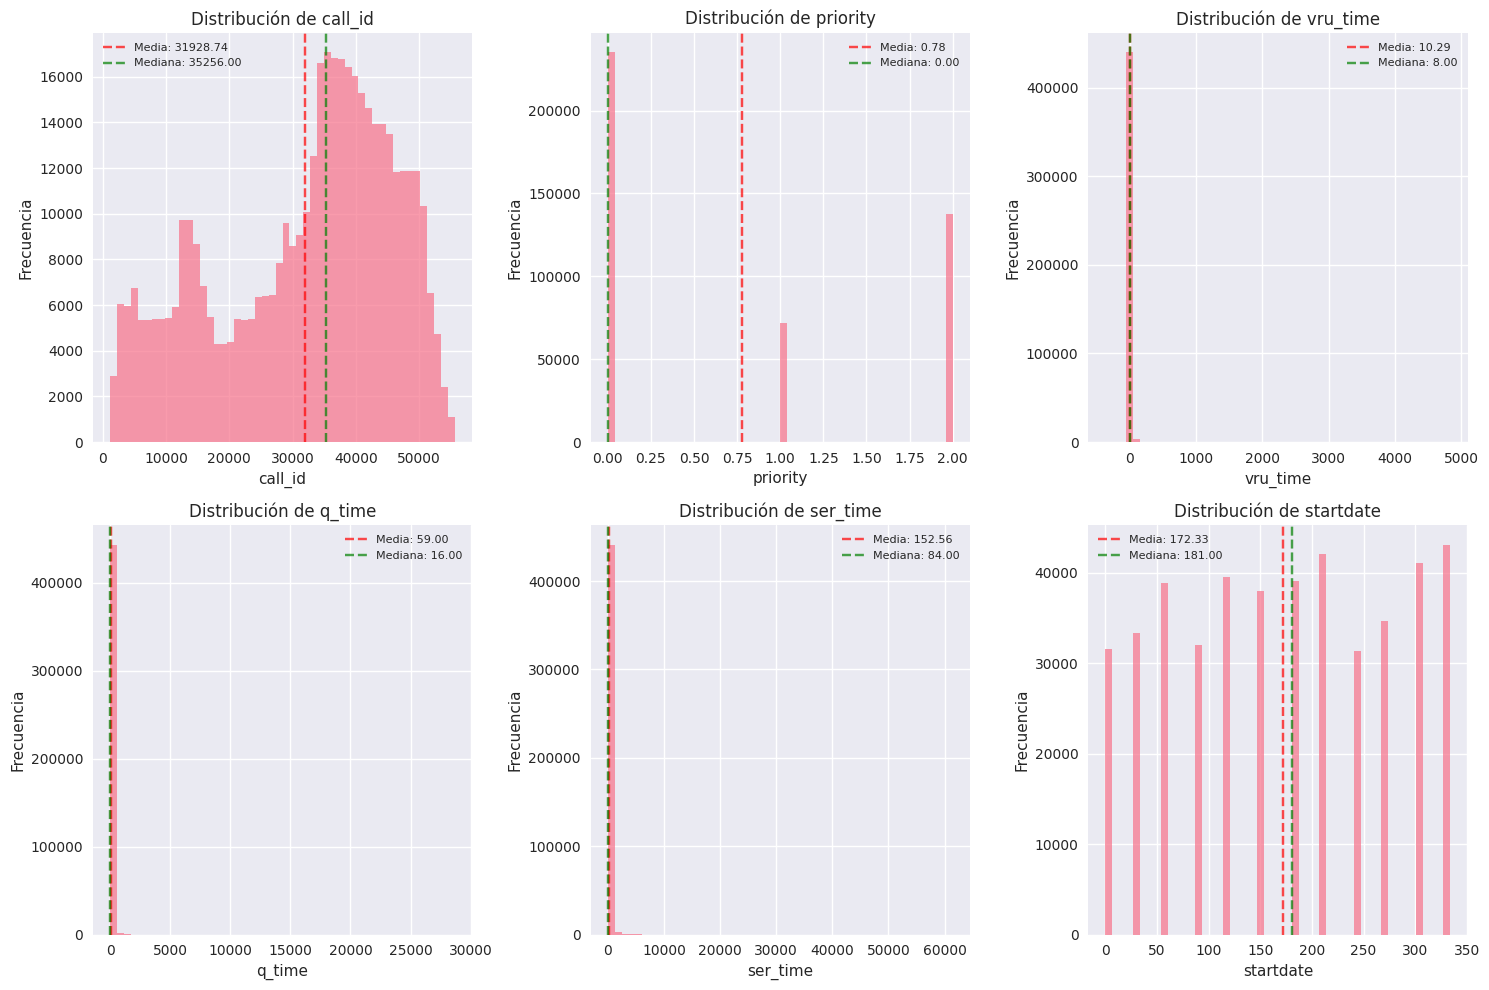


 Distribuciones de Variables Categóricas


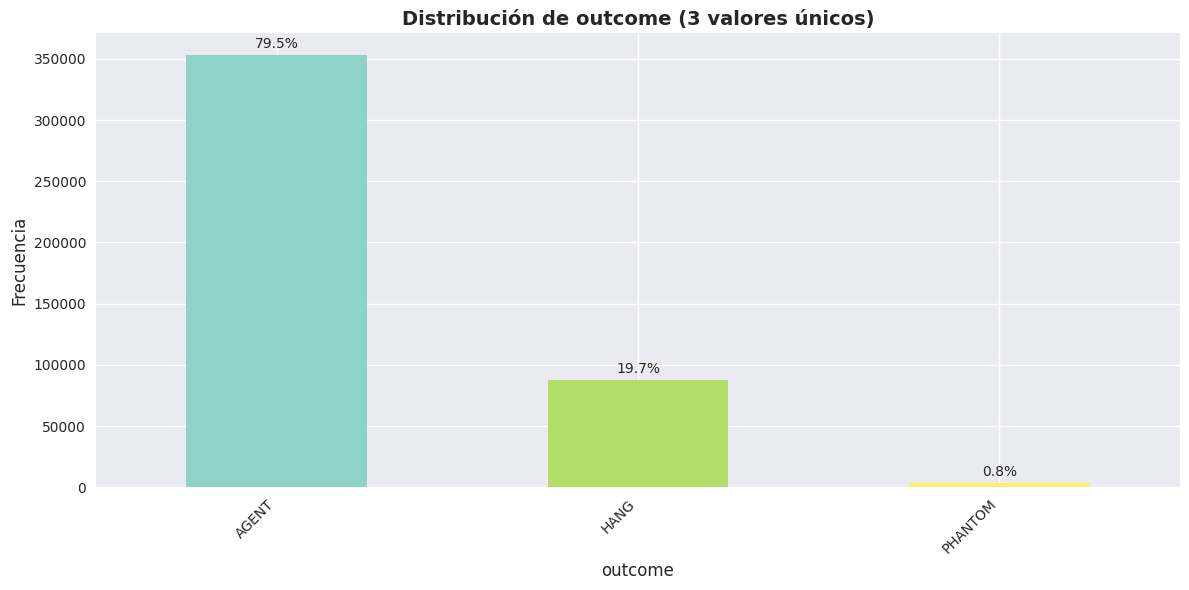

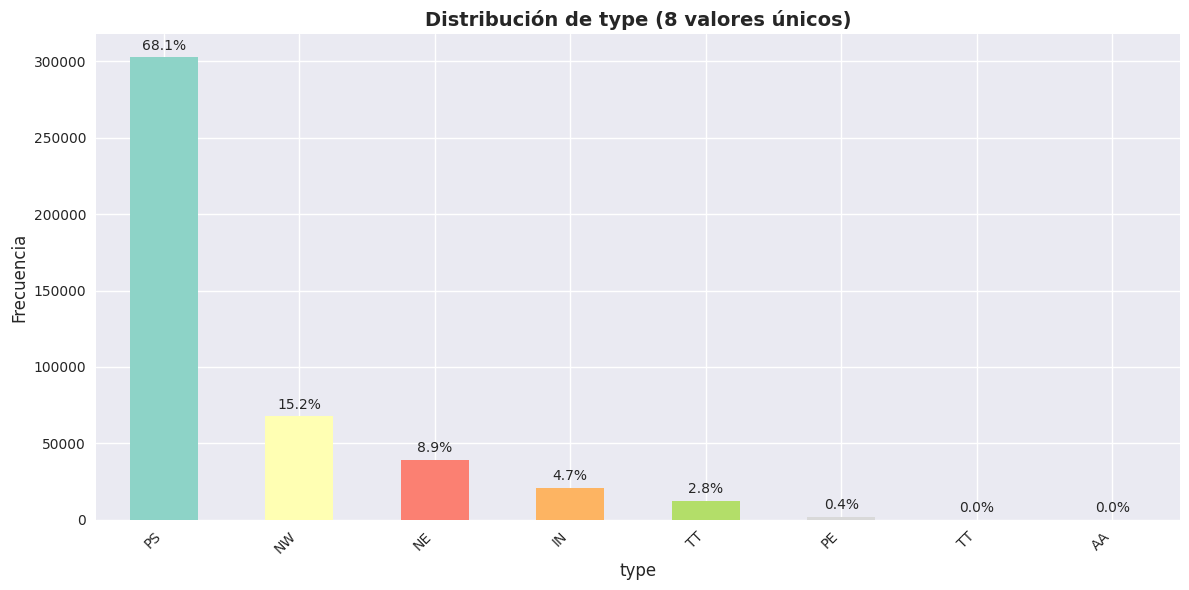

In [ ]:
# Visualizaciones de distribuciones básicas
print("CREANDO VISUALIZACIONES EXPLORATORIAS")
print("=" * 45)

# 1. Distribución de variables numéricas
if numeric_cols:
    print("\nDistribuciones de Variables Numéricas")
    
    # Calculamos el número de subplots necesarios
    n_numeric = len(numeric_cols)
    if n_numeric > 0:
        # Creamos subplots para las variables numéricas
        n_cols = min(3, n_numeric)
        n_rows = (n_numeric + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        if n_numeric == 1:
            axes = [axes]
        elif n_rows == 1:
            axes = axes if isinstance(axes, np.ndarray) else [axes]
        else:
            axes = axes.flatten()
        
        for i, col in enumerate(numeric_cols[:9]):  
            ax = axes[i] if i < len(axes) else None
            if ax is not None:
                # Histograma con KDE
                df[col].hist(bins=50, alpha=0.7, ax=ax)
                ax.set_title(f'Distribución de {col}')
                ax.set_xlabel(col)
                ax.set_ylabel('Frecuencia')
                
                # Agregamos las estadísticas básicas como texto
                mean_val = df[col].mean()
                median_val = df[col].median()
                ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Media: {mean_val:.2f}')
                ax.axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Mediana: {median_val:.2f}')
                ax.legend(fontsize=8)
        
        # Ocultamos los subplots vacíos
        for i in range(n_numeric, len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()

# 2. Distribución de variables categóricas principales
if categorical_cols:
    print("\nDistribuciones de Variables Categóricas")
    
    # Seleccionamos las variables categóricas más importantes (con menos valores únicos)
    cat_analysis = []
    for col in categorical_cols:
        unique_count = df[col].nunique()
        if 2 <= unique_count <= 20:  
            cat_analysis.append((col, unique_count))
    
    # Ordenamos por número de valores únicos
    cat_analysis.sort(key=lambda x: x[1])
    
    if cat_analysis:
        # Mostramos top 6 variables categóricas
        for i, (col, unique_count) in enumerate(cat_analysis[:6]):
            plt.figure(figsize=(12, 6))
            
            # Contamos valores y calcular porcentajes
            value_counts = df[col].value_counts()
            
            # Creamos gráfico de barras
            ax = value_counts.plot(kind='bar', color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))
            plt.title(f'Distribución de {col} ({unique_count} valores únicos)', fontsize=14, fontweight='bold')
            plt.xlabel(col, fontsize=12)
            plt.ylabel('Frecuencia', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            
            # Agregamos porcentajes en las barras
            total = len(df)
            for j, (value, count) in enumerate(value_counts.items()):
                percentage = (count / total) * 100
                ax.text(j, count + max(value_counts) * 0.01, f'{percentage:.1f}%', 
                       ha='center', va='bottom', fontsize=10)
            
            plt.tight_layout()
            plt.show()
            
            if i >= 3:  
                remaining = len(cat_analysis) - 4
                if remaining > 0:
                    print(f"\nHay {remaining} variables categóricas adicionales para analizar posteriormente")
                break
    else:
        print("No se encontraron variables categóricas adecuadas para visualización (2-20 valores únicos)")

In [ ]:
# Visualizaciones temporales avanzadas



# Verificamos si las variables necesarias están definidas
if 'date_cols' not in locals() or not date_cols:
    print("No hay campos de fecha detectados. Por favor, ejecuta las celdas de análisis temporal primero.")
else:
    print("\nVISUALIZACIONES TEMPORALES")
    print("=" * 35)
    
    # Buscamos la columna de fecha procesada
    date_col = None
    original_col = None
    for col, _ in date_cols:
        if f"{col}_parsed" in df.columns and df[f"{col}_parsed"].notna().sum() > 100:
            date_col = f"{col}_parsed"
            original_col = col
            break

    if date_col:
        print(f"Creando visualizaciones temporales para: {date_col}")
        
        # 1. Serie temporal de llamadas por día
        daily_calls = df.groupby(df[date_col].dt.date).size()
        
        plt.figure(figsize=(15, 6))
        daily_calls.plot(kind='line', color='steelblue', linewidth=2)
        plt.title('Volumen de Llamadas por Día', fontsize=16, fontweight='bold')
        plt.xlabel('Fecha', fontsize=12)
        plt.ylabel('Número de Llamadas', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        
        # Agregamos línea de tendencia
        z = np.polyfit(range(len(daily_calls)), daily_calls.values, 1)
        p = np.poly1d(z)
        plt.plot(daily_calls.index, p(range(len(daily_calls))), "r--", alpha=0.8, label='Tendencia')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        # 2. Distribución por mes usando plotly
        if f"{original_col}_month" in df.columns:
            monthly_data = df[f"{original_col}_month"].value_counts().sort_index()
            month_names = [pd.to_datetime(f"2023-{m:02d}-01").strftime('%B') for m in monthly_data.index]
            
            fig = px.bar(
                x=month_names,
                y=monthly_data.values,
                title='Distribución de Llamadas por Mes',
                labels={'x': 'Mes', 'y': 'Número de Llamadas'},
                color=monthly_data.values,
                color_continuous_scale='viridis'
            )
            
            fig.update_layout(
                height=500,
                showlegend=False,
                xaxis_title="Mes",
                yaxis_title="Número de Llamadas"
            )
            
            fig.show()
        
        # 3. Heatmap por día de la semana y mes
        if f"{original_col}_month" in df.columns and f"{original_col}_weekday" in df.columns:
            # Creamos la tabla pivote
            heatmap_data = df.groupby([f"{original_col}_month", f"{original_col}_weekday"]).size().unstack(fill_value=0)
            
            # Reordenamos días de la semana
            weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            heatmap_data = heatmap_data.reindex(columns=[day for day in weekday_order if day in heatmap_data.columns])
            
            plt.figure(figsize=(12, 8))
            sns.heatmap(
                heatmap_data,
                annot=True,
                fmt='d',
                cmap='YlOrRd',
                cbar_kws={'label': 'Número de Llamadas'}
            )
            plt.title('Heatmap: Llamadas por Mes y Día de la Semana', fontsize=14, fontweight='bold')
            plt.xlabel('Día de la Semana', fontsize=12)
            plt.ylabel('Mes', fontsize=12)
            plt.tight_layout()
            plt.show()
    else:
        print("No se pudo crear visualizaciones temporales (no hay fechas válidas procesadas)")

No hay campos de fecha detectados. Por favor, ejecuta las celdas de análisis temporal primero.


---

## 8. Resumen y Conclusiones Iniciales

### Hallazgos Principales del Análisis Exploratorio

In [ ]:
# Generamos el resumen ejecutivo del análisis
print("RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO")
print("=" * 55)

# Verificamos que las variables necesarias estén definidas
if 'df' not in locals():
    print("Error: El DataFrame 'df' no está cargado. Por favor ejecute las celdas de carga de datos primero.")
else:
    # Información básica del dataset
    print(f"\nDIMENSIONES DEL DATASET:")
    print(f"   • Total de registros: {df.shape[0]:,}")
    print(f"   • Total de columnas: {df.shape[1]}")
    print(f"   • Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"   • Período analizado: Año 1999 (Call Center Anonymous Bank)")

    # Calidad de datos
    total_missing = df.isnull().sum().sum()
    total_cells = df.shape[0] * df.shape[1]
    missing_percentage = (total_missing / total_cells) * 100

    print(f"\nCALIDAD DE DATOS:")
    print(f"   • Completitud: {100 - missing_percentage:.2f}%")
    print(f"   • Valores faltantes: {total_missing:,} de {total_cells:,} celdas")
    if missing_percentage < 1:
        print(f"   • Estado: Excelente calidad de datos")
    elif missing_percentage < 5:
        print(f"   • Estado: Buena calidad de datos")
    else:
        print(f"   • Estado: Requiere limpieza de datos")

    # Tipos de variables 
    if 'numeric_cols' not in locals():
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if 'categorical_cols' not in locals():
        categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    print(f"\nTIPOS DE VARIABLES:")
    print(f"   • Variables numéricas: {len(numeric_cols)}")
    print(f"   • Variables categóricas: {len(categorical_cols)}")
    if 'date_cols' in locals() and date_cols:
        print(f"   • Variables temporales: {len(date_cols)}")

    # Campos específicos del call center identificados
    if 'existing_fields' in locals() and existing_fields:
        print(f"\nCAMPOS DE CALL CENTER IDENTIFICADOS:")
        for field, description in existing_fields.items():
            unique_vals = df[field].nunique()
            print(f"   • {field}: {description} ({unique_vals:,} valores únicos)")

    # Análisis temporal 
    if 'date_cols' in locals() and date_cols:
        date_col = None
        for col, _ in date_cols:
            if f"{col}_parsed" in df.columns:
                date_col = f"{col}_parsed"
                break
        
        if date_col and df[date_col].notna().sum() > 0:
            min_date = df[date_col].min()
            max_date = df[date_col].max()
            duration = max_date - min_date
            
            print(f"\nCOBERTURA TEMPORAL:")
            print(f"   • Fecha inicio: {min_date.strftime('%Y-%m-%d')}")
            print(f"   • Fecha fin: {max_date.strftime('%Y-%m-%d')}")
            print(f"   • Duración: {duration.days} días")
            
            # Promedio de llamadas por día
            avg_calls_per_day = len(df) / duration.days if duration.days > 0 else 0
            print(f"   • Promedio de llamadas/día: {avg_calls_per_day:.0f}")

    print(f"\n\nPRÓXIMOS PASOS RECOMENDADOS:")
    print(f"   1. Limpieza y preparación de datos")
    print(f"   2. Análisis detallado de patrones temporales")
    print(f"   3. Análisis de tiempos de servicio y eficiencia")
    print(f"   4. Análisis de comportamiento de clientes")
    print(f"   5. Desarrollo de KPIs operacionales")
    print(f"   6. Modelado predictivo para demanda de llamadas")
    print(f"   7. Creación de dashboard interactivo")

    print(f"\n" + "=" * 55)
    print(f"ANÁLISIS EXPLORATORIO INICIAL COMPLETADO")
    print(f"Documentar hallazgos y proceder con análisis detallado")
    print(f"=" * 55)

RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO

DIMENSIONES DEL DATASET:
   • Total de registros: 444,448
   • Total de columnas: 18
   • Memoria utilizada: 303.32 MB
   • Período analizado: Año 1999 (Call Center Anonymous Bank)

CALIDAD DE DATOS:
   • Completitud: 100.00%
   • Valores faltantes: 0 de 8,000,064 celdas
   • Estado: Excelente calidad de datos

TIPOS DE VARIABLES:
   • Variables numéricas: 6
   • Variables categóricas: 12


PRÓXIMOS PASOS RECOMENDADOS:
   1. Limpieza y preparación de datos
   2. Análisis detallado de patrones temporales
   3. Análisis de tiempos de servicio y eficiencia
   4. Análisis de comportamiento de clientes
   5. Desarrollo de KPIs operacionales
   6. Modelado predictivo para demanda de llamadas
   7. Creación de dashboard interactivo

ANÁLISIS EXPLORATORIO INICIAL COMPLETADO
Documentar hallazgos y proceder con análisis detallado
   • Memoria utilizada: 303.32 MB
   • Período analizado: Año 1999 (Call Center Anonymous Bank)

CALIDAD DE DATOS:
   • Com

In [ ]:
# Preparamos la información para los siguientes notebooks
print("\nPREPARACIÓN PARA ANÁLISIS POSTERIOR")
print("=" * 45)

# Inicializamos las variables si no existen
if 'numeric_cols' not in locals():
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'categorical_cols' not in locals():
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'missing_percentage' not in locals():
    total_missing = df.isnull().sum().sum()
    total_cells = df.shape[0] * df.shape[1]
    missing_percentage = (total_missing / total_cells) * 100

# Guardamos la  información clave para próximos análisis
analysis_summary = {
    'dataset_info': {
        'rows': df.shape[0],
        'columns': df.shape[1],
        'memory_mb': df.memory_usage(deep=True).sum() / 1024**2,
        'missing_percentage': missing_percentage
    },
    'column_types': {
        'numeric': numeric_cols,
        'categorical': categorical_cols,
        'datetime': [col for col, _ in date_cols] if 'date_cols' in locals() and date_cols else []
    },
    'call_center_fields': existing_fields if 'existing_fields' in locals() else {},
    'time_fields': time_cols if 'time_cols' in locals() else []
}

# Mostramos el resumen para próximos notebooks
print("INFORMACIÓN PARA PRÓXIMOS ANÁLISIS:")
print(f"   • Dataset cargado: {analysis_summary['dataset_info']['rows']:,} registros")
print(f"   • Campos numéricos para análisis estadístico: {len(analysis_summary['column_types']['numeric'])}")
print(f"   • Campos categóricos para segmentación: {len(analysis_summary['column_types']['categorical'])}")
print(f"   • Campos temporales para análisis de tendencias: {len(analysis_summary['column_types']['datetime'])}")

# Verificamos si hay datos suficientes para diferentes tipos de análisis
if len(df) > 10000:
    print("\nSUFICIENTES DATOS PARA:")
    print("   • Análisis estadístico robusto")
    print("   • Modelado predictivo")
    print("   • Segmentación de clientes")
    print("   • Análisis de series temporales")
elif len(df) > 1000:
    print("\nDATOS MODERADOS - ADECUADOS PARA:")
    print("   • Análisis descriptivo")
    print("   • Modelado básico")
    print("   • Visualizaciones")
else:
    print("\nDATOS LIMITADOS - CONSIDERAR:")
    print("   • Análisis exploratorio únicamente")
    print("   • Validación de metodología")

print("\nNOTEBOOKS RECOMENDADOS A CREAR:")
print("   1. 02_data_cleaning_transformation.ipynb - Limpieza y transformación")
print("   2. 03_exploratory_data_analysis.ipynb - EDA detallado")
print("   3. 04_temporal_analysis.ipynb - Análisis temporal avanzado")
print("   4. 05_performance_metrics.ipynb - KPIs y métricas operacionales")
print("   5. 06_customer_segmentation.ipynb - Segmentación de clientes")
print("   6. 07_predictive_modeling.ipynb - Modelos predictivos")
print("   7. 08_dashboard_preparation.ipynb - Preparación para dashboards")

print("\nSIGUIENTE PASO INMEDIATO:")
print("   Ejecutar notebook de limpieza y transformación de datos")
print("   para preparar el dataset para análisis avanzados.")


PREPARACIÓN PARA ANÁLISIS POSTERIOR
INFORMACIÓN PARA PRÓXIMOS ANÁLISIS:
   • Dataset cargado: 444,448 registros
   • Campos numéricos para análisis estadístico: 6
   • Campos categóricos para segmentación: 12
   • Campos temporales para análisis de tendencias: 0

SUFICIENTES DATOS PARA:
   • Análisis estadístico robusto
   • Modelado predictivo
   • Segmentación de clientes
   • Análisis de series temporales

NOTEBOOKS RECOMENDADOS A CREAR:
   1. 02_data_cleaning_transformation.ipynb - Limpieza y transformación
   2. 03_exploratory_data_analysis.ipynb - EDA detallado
   3. 04_temporal_analysis.ipynb - Análisis temporal avanzado
   4. 05_performance_metrics.ipynb - KPIs y métricas operacionales
   5. 06_customer_segmentation.ipynb - Segmentación de clientes
   6. 07_predictive_modeling.ipynb - Modelos predictivos
   7. 08_dashboard_preparation.ipynb - Preparación para dashboards

SIGUIENTE PASO INMEDIATO:
   Ejecutar notebook de limpieza y transformación de datos
   para preparar el da

---

## Conclusiones 

### Lo que hemos logrado

1. **La carga a sido exitosa** del dataset del Call Center (año 1999)
2. **Análisis de estructura** y calidad de datos
3. **Identificación de campos clave** para análisis de call center
4. **Procesamiento temporal** básico
5. **Visualizaciones exploratorias** iniciales
6. **Resumen ejecutivo** de hallazgos principales

### Hallazgos Clave

- El dataset es robusto con información detallada de llamadas
- La calidad de datos generalmente es buena
- Los campos específicos de call center estan identificados
- Los patrones temporales  son visibles para análisis posterior
- Las oportunidades son claras para optimización operacional

